# Data Mining and Big Data Analytics 
### Instructor: Márton Karsai, Associate Professor

## 1st Hands-on session

Given the `breast cancer Wisconsin dataset` in scikit-learn, solve a tipical binary classification problem. 

The idea is to use all the tools we introduced so far in the class to find the best solution possible. In particular, the exercise should involve the following steps:


1. **Import libraries, load the data**

2. **Exploration and preparation**

    * check the imbalance in data
    * check missing values (if any)
    * understand the data better using plots
    * make some hypotheses using the plots and think about possible features representing them. Note that these features might/might not work when implemented in the real model.

3. **Train a Decision Tree classifier**

4. **Evaluate the performance of the classifier**

    * Elaborate on the different type of errors your classifier is making and use different metrics to have a complete picture of the model behavior.   

5. **Optimization**

    * Explore the hyperparameters space looking for the configuration that optimizes the model performance. 

6. **Train an alternative classifier (K-NN) and repeat steps 4-5**

7. **Decide wich approach to use if you were asked to solve the problem in a real case**

## 1. Import libraries, load the data

In [2]:
# Setting up matplotlib
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

%matplotlib inline

# Setting up pandas
import pandas as pd

C:\Users\molda\AppData\Local\Temp/ipykernel_1288/1955125352.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [3]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X, y = data.data, data.target

In [4]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## 2. Exploration and preparation

    * check the imbalance in data
    * check missing values (if any)
    * understand the data better using plots
    * make some hypotheses using the plots and think about possible features representing them. Note that these features might/might not work when implemented in the real model.

Create a pandas dataframe for the data exploration phase

In [5]:
df = pd.DataFrame(X, columns = data.feature_names)
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

### Explicite ToDo List:
* Print feature names
* Print target names 
* Count null values in the data
* Describe the data
* Identify outliers of a feature (e.g. 'mean perimeter') = instances with any feature value 3 STD further than the population average
* Plot the boxplot and distribution of a selected feature (e.g. 'mean perimeter')
* Remove missing values
* Check the imbalance of the data by computing the variance of each features over the population
* Plot feature distributions and correlaitons using scatter_matrix
* Reduce the number of features by replacing those which are strongly correlated by only one
* Drop all the features which are not the mean values of different metrics
* Plot feature distributions and correlaitons using scatter_matrix if the filtered features

In [6]:
print(data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [7]:
print(data.target_names)

['malignant' 'benign']


In [8]:
df.isnull().any().any()

False

In [9]:
df.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst radius  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       worst texture  worst perimeter   worst area  worst smoothness  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       worst compactness  worst concavity  worst concave points  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       worst symmetry  worst fractal dimension  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [10]:
n_samples, n_features = data.data.shape
print('Number of samples:', n_samples)
print('Number of features:', n_features)

Number of samples: 569
Number of features: 30


In [11]:
col = 'mean perimeter'
outliers = df[df[col] > df[col].mean() + 3 * df[col].std()]
outliers

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
82         25.22         24.91           171.5     1878.0           0.1063   
122        24.25         20.20           166.2     1761.0           0.1447   
180        27.22         21.87           182.1     2250.0           0.1094   
212        28.11         18.47           188.5     2499.0           0.1142   
352        25.73         17.46           174.2     2010.0           0.1149   
461        27.42         26.27           186.9     2501.0           0.1084   
521        24.63         21.60           165.5     1841.0           0.1030   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
82             0.2665          0.3339               0.1845         0.1829   
122            0.2867          0.4268               0.2012         0.2655   
180            0.1914          0.2871               0.1878         0.1800   
212            0.1516          0.3201               0.1595         0.1648   
352            0.2363          0.3368               0.1913         0.1956   
461            0.1988          0.3635               0.1689         0.2061   
521            0.2106          0.2310               0.1471         0.1991   

     mean fractal dimension  ...  worst radius  worst texture  \
82                  0.06782  ...         30.00          33.62   
122                 0.06877  ...         26.02          23.99   
180                 0.05770  ...         33.12          32.85   
212                 0.05525  ...         28.11          18.47   
352                 0.06121  ...         33.13          23.58   
461                 0.05623  ...         36.04          31.37   
521                 0.06739  ...         29.92          26.93   

     worst perimeter  worst area  worst smoothness  worst compactness  \
82             211.7      2562.0            0.1573             0.6076   
122            180.9      2073.0            0.1696             0.4244   
180            220.8      3216.0            0.1472             0.4034   
212            188.5      2499.0            0.1142             0.1516   
352            229.3      3234.0            0.1530             0.5937   
461            251.2      4254.0            0.1357             0.4256   
521            205.7      2642.0            0.1342             0.4188   

     worst concavity  worst concave points  worst symmetry  \
82            0.6476                0.2867          0.2355   
122           0.5803                0.2248          0.3222   
180           0.5340                0.2688          0.2856   
212           0.3201                0.1595          0.1648   
352           0.6451                0.2756          0.3690   
461           0.6833                0.2625          0.2641   
521           0.4658                0.2475          0.3157   

     worst fractal dimension  
82                   0.10510  
122                  0.08009  
180                  0.08082  
212                  0.05525  
352                  0.08815  
461                  0.07427  
521                  0.09671  

[7 rows x 30 columns]

In [12]:
mask=(df>df.mean()+3*df.std()) | (df<df.mean()-3*df.std())

In [13]:
df[mask]

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0            NaN           NaN             NaN        NaN              NaN   
1            NaN           NaN             NaN        NaN              NaN   
2            NaN           NaN             NaN        NaN              NaN   
3            NaN           NaN             NaN        NaN          0.14250   
4            NaN           NaN             NaN        NaN              NaN   
..           ...           ...             ...        ...              ...   
564          NaN           NaN             NaN        NaN              NaN   
565          NaN           NaN             NaN        NaN              NaN   
566          NaN           NaN             NaN        NaN              NaN   
567          NaN           NaN             NaN        NaN              NaN   
568          NaN           NaN             NaN        NaN          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0              0.2776             NaN                  NaN            NaN   
1                 NaN             NaN                  NaN            NaN   
2                 NaN             NaN                  NaN            NaN   
3              0.2839             NaN                  NaN            NaN   
4                 NaN             NaN                  NaN            NaN   
..                ...             ...                  ...            ...   
564               NaN             NaN                  NaN            NaN   
565               NaN             NaN                  NaN            NaN   
566               NaN             NaN                  NaN            NaN   
567            0.2770          0.3514                  NaN            NaN   
568               NaN             NaN                  NaN            NaN   

     mean fractal dimension  ...  worst radius  worst texture  \
0                       NaN  ...           NaN            NaN   
1                       NaN  ...           NaN            NaN   
2                       NaN  ...           NaN            NaN   
3                   0.09744  ...           NaN            NaN   
4                       NaN  ...           NaN            NaN   
..                      ...  ...           ...            ...   
564                     NaN  ...           NaN            NaN   
565                     NaN  ...           NaN            NaN   
566                     NaN  ...           NaN            NaN   
567                     NaN  ...           NaN            NaN   
568                     NaN  ...           NaN            NaN   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0                NaN         NaN               NaN                NaN   
1                NaN         NaN               NaN                NaN   
2                NaN         NaN               NaN                NaN   
3                NaN         NaN            0.2098             0.8663   
4                NaN         NaN               NaN                NaN   
..               ...         ...               ...                ...   
564              NaN         NaN               NaN                NaN   
565              NaN         NaN               NaN                NaN   
566              NaN         NaN               NaN                NaN   
567              NaN         NaN               NaN             0.8681   
568              NaN         NaN               NaN                NaN   

     worst concavity  worst concave points  worst symmetry  \
0                NaN                   NaN             NaN   
1                NaN                   NaN             NaN   
2                NaN                   NaN             NaN   
3                NaN                   NaN          0.6638   
4                NaN                   NaN             NaN   
..               ...                   ...             ...   
564              NaN                   NaN         

<AxesSubplot:xlabel='mean perimeter'>

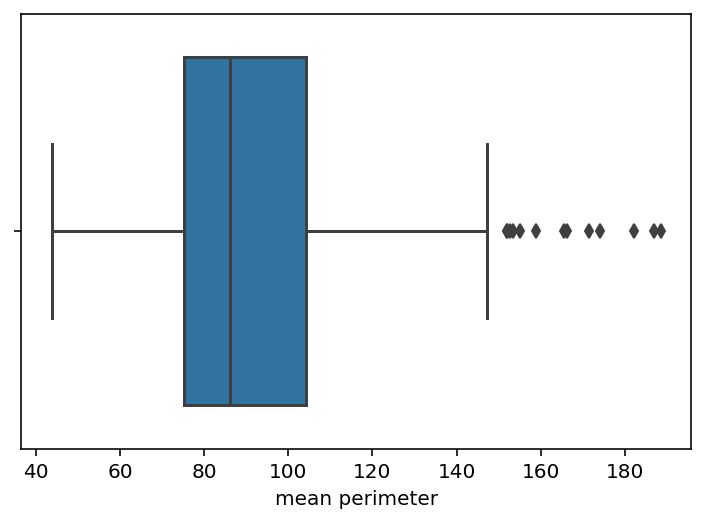

In [14]:
import seaborn as sns

sns.boxplot(x=df[col])

<AxesSubplot:ylabel='Frequency'>

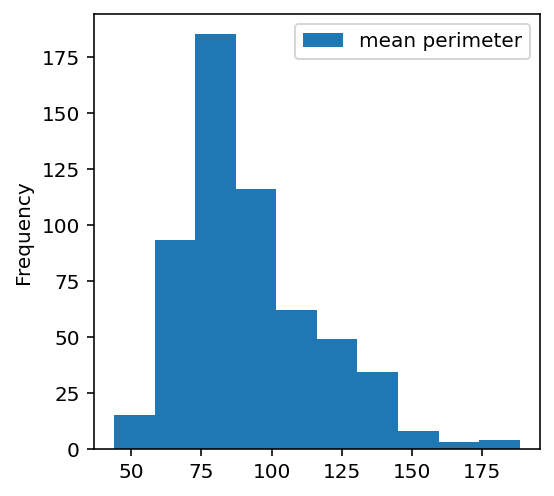

In [15]:
df[col].plot(kind='hist', figsize=(4,4), label=col, legend=True)

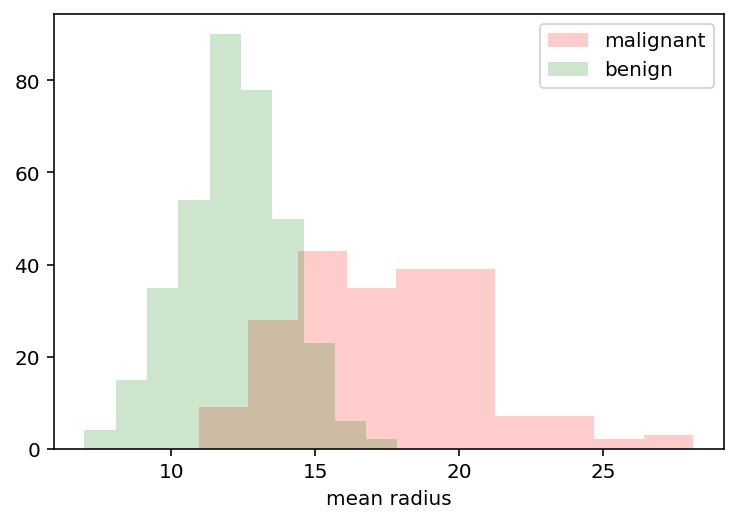

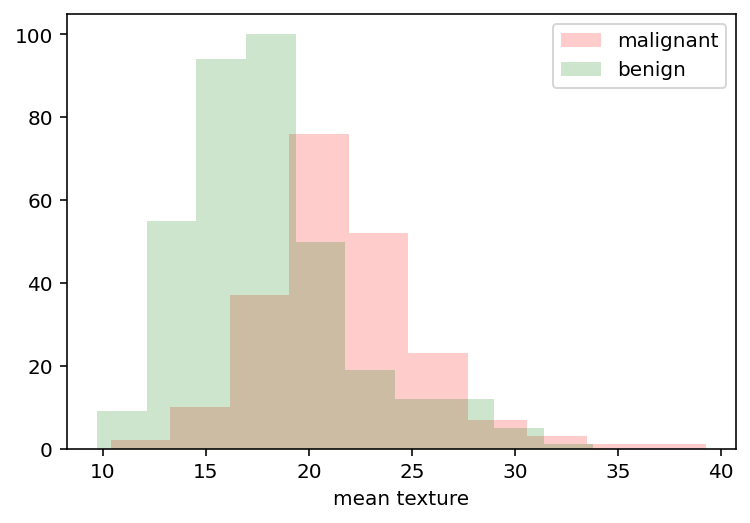

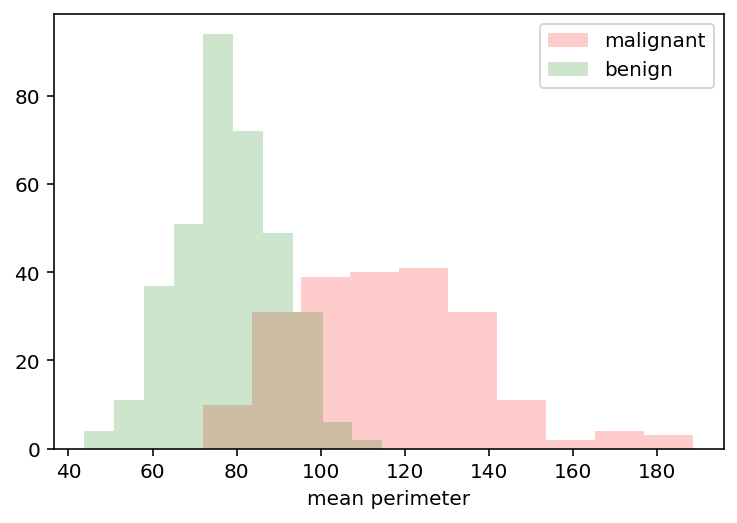

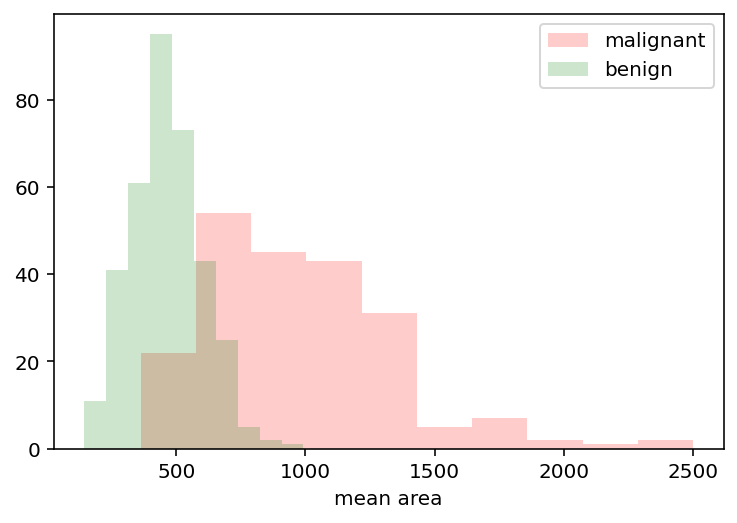

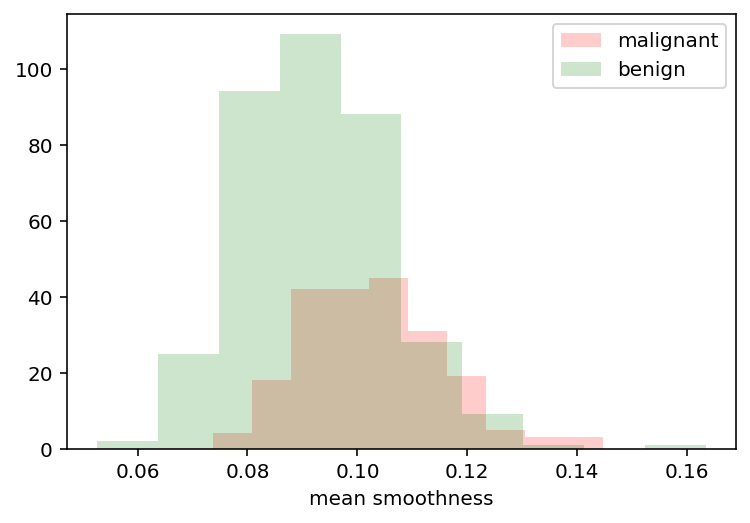

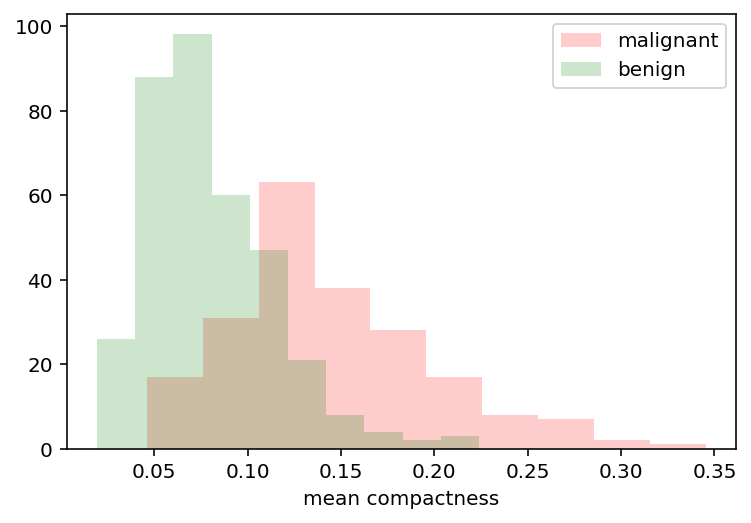

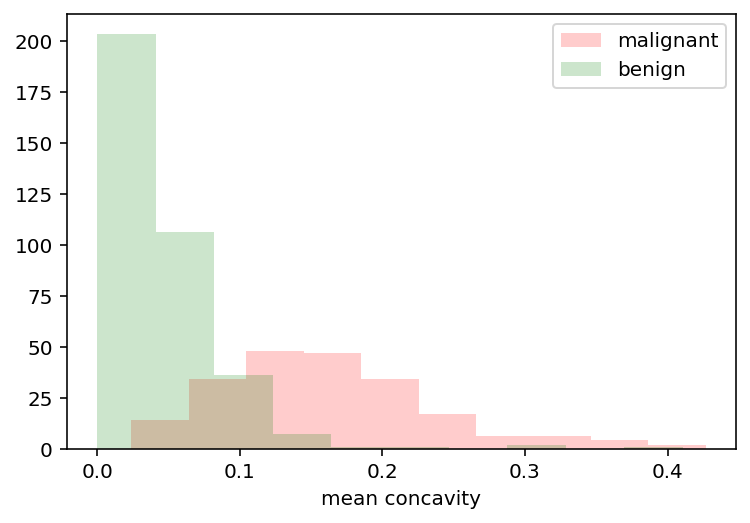

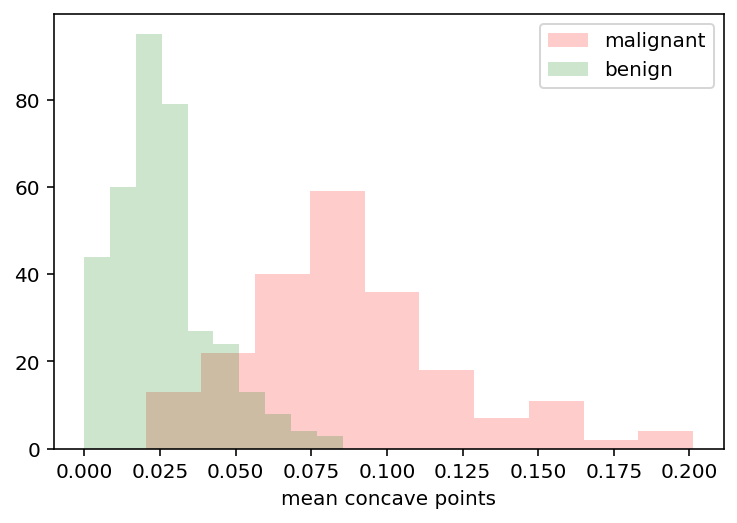

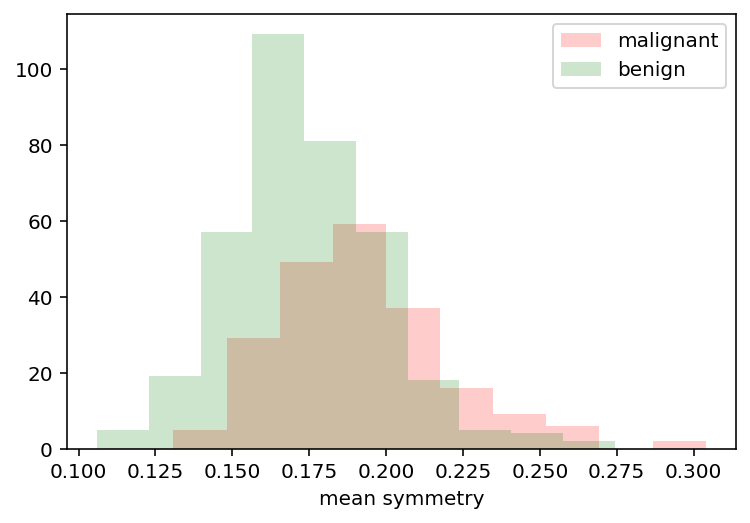

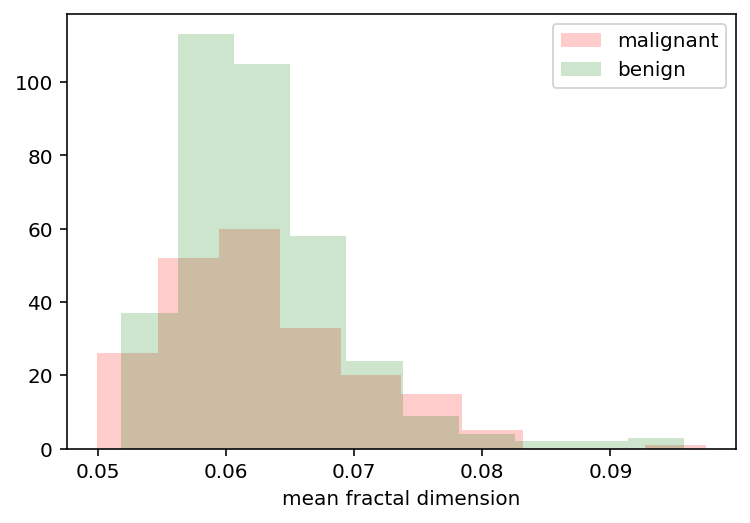

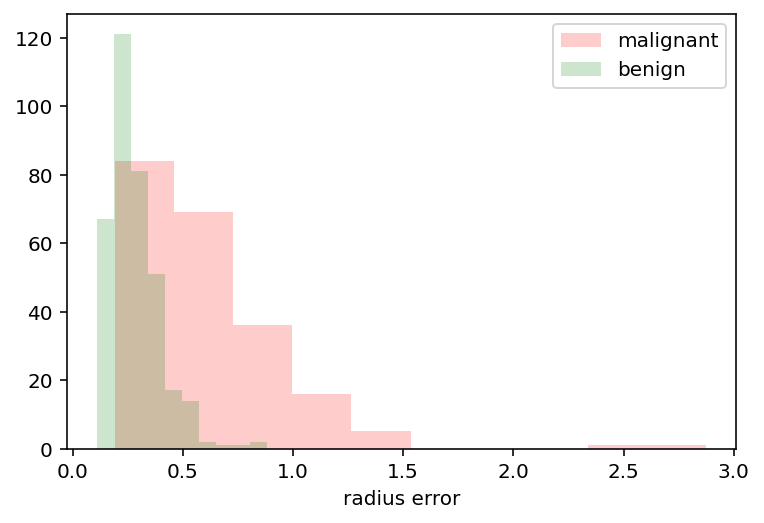

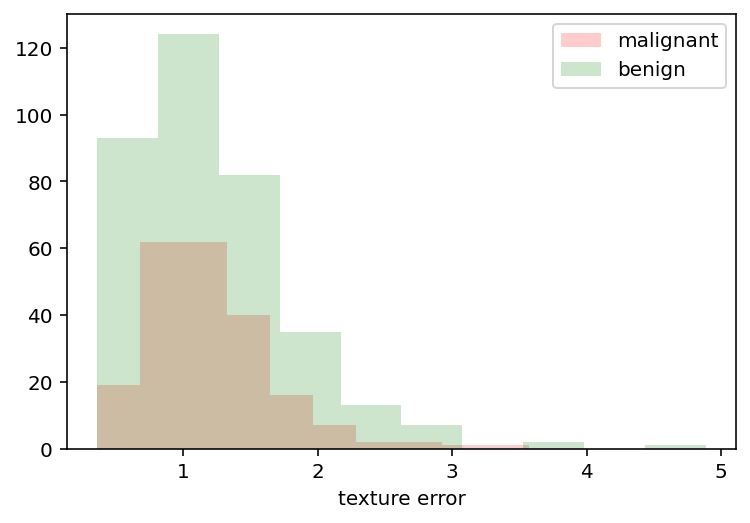

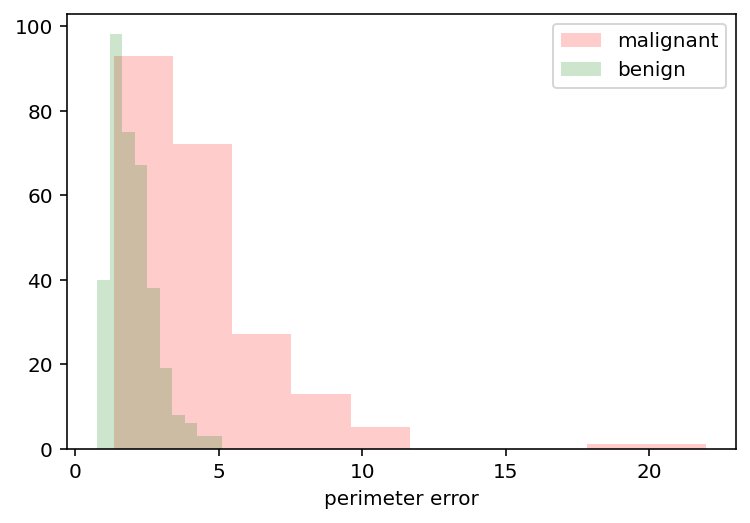

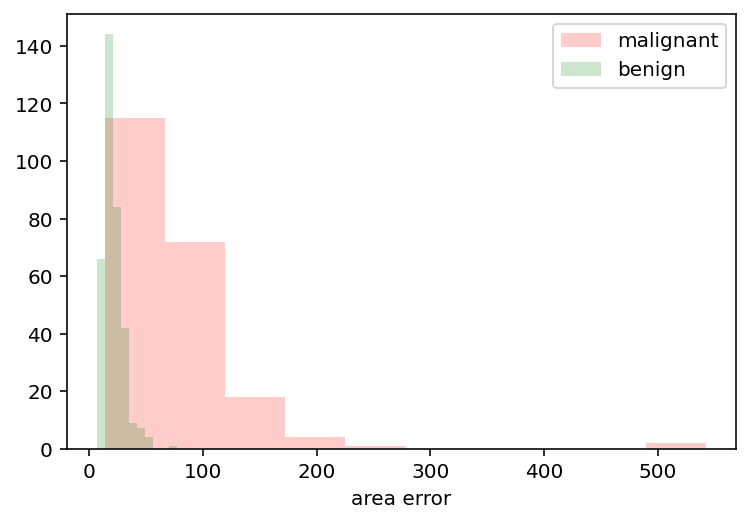

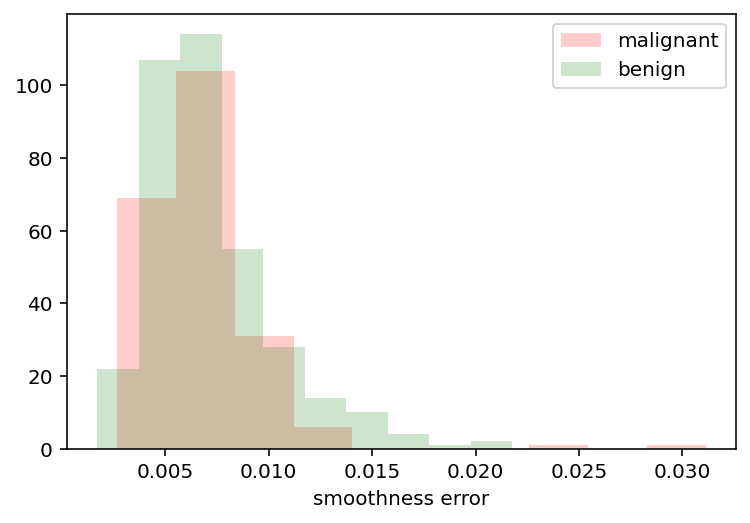

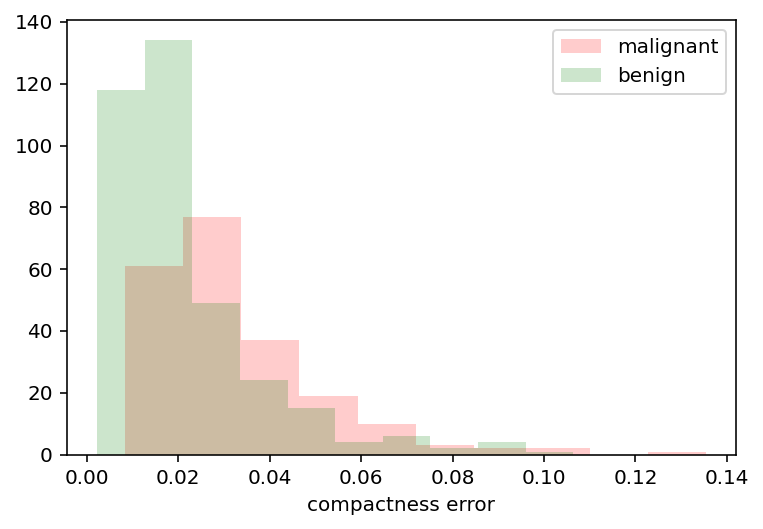

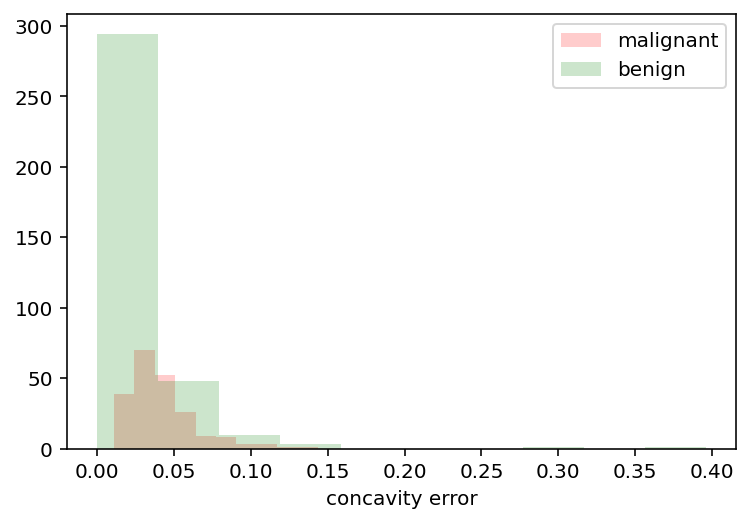

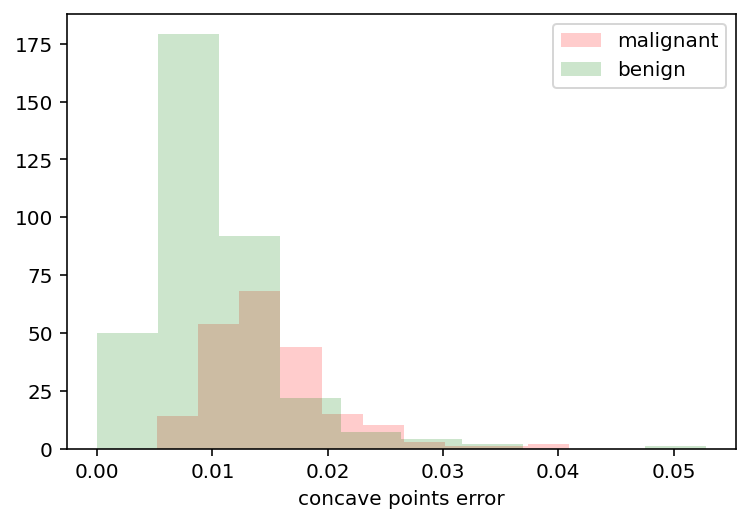

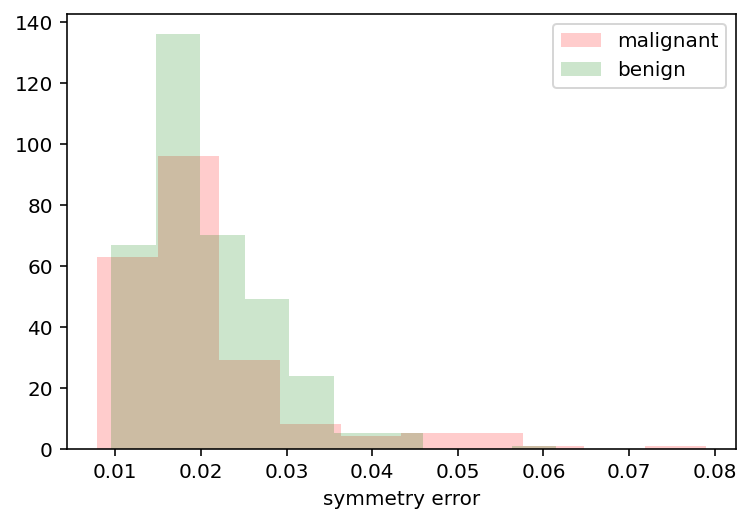

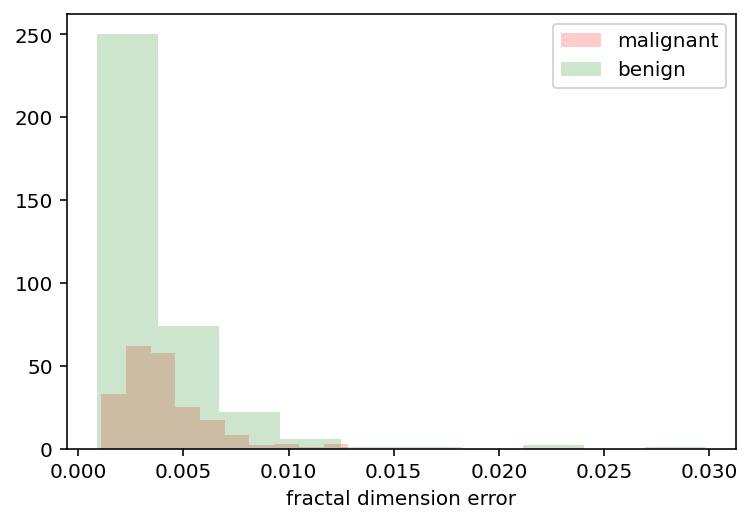

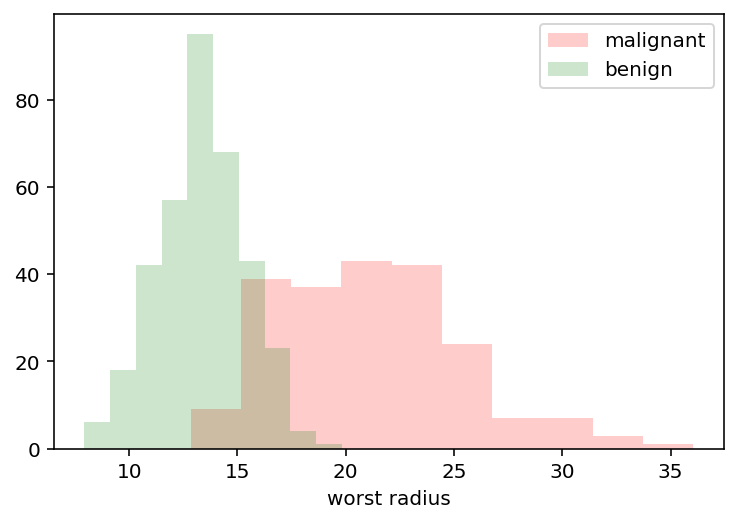

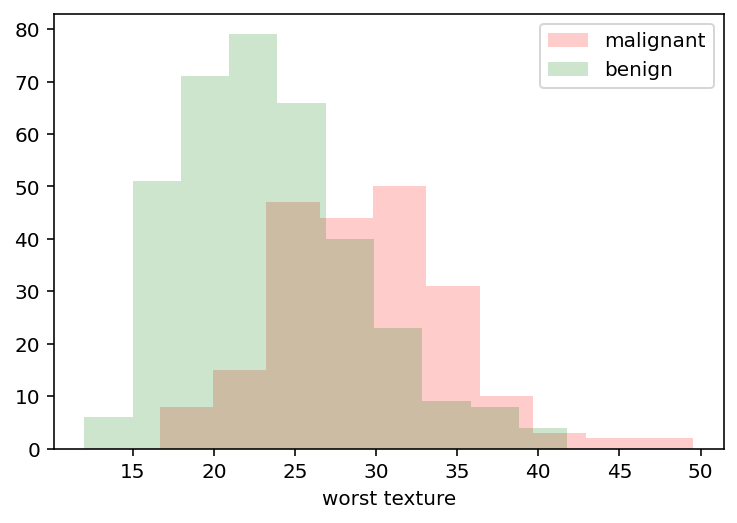

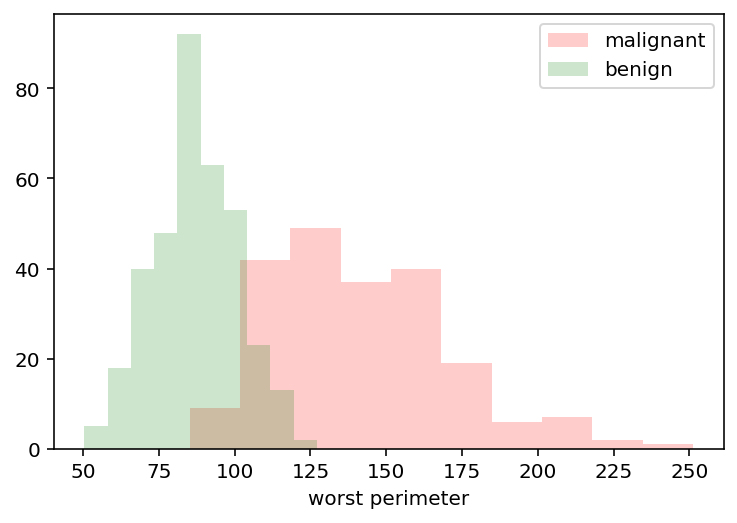

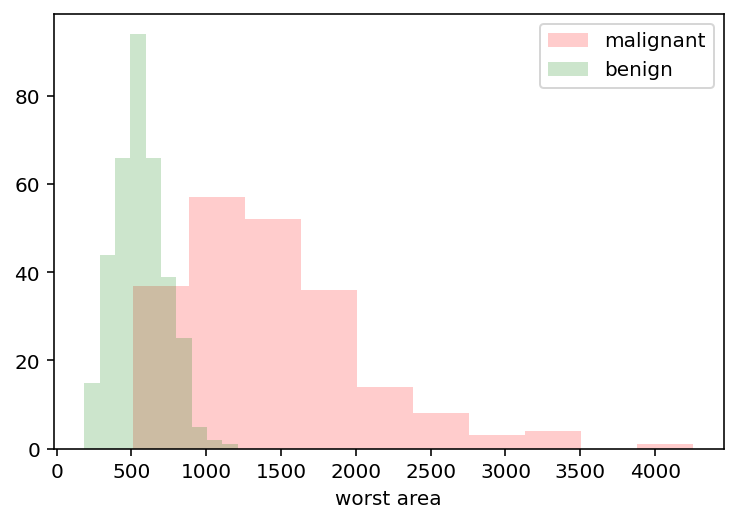

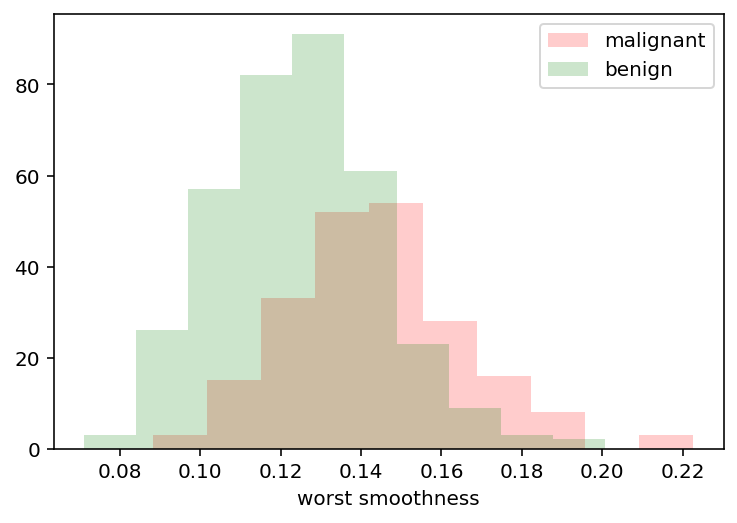

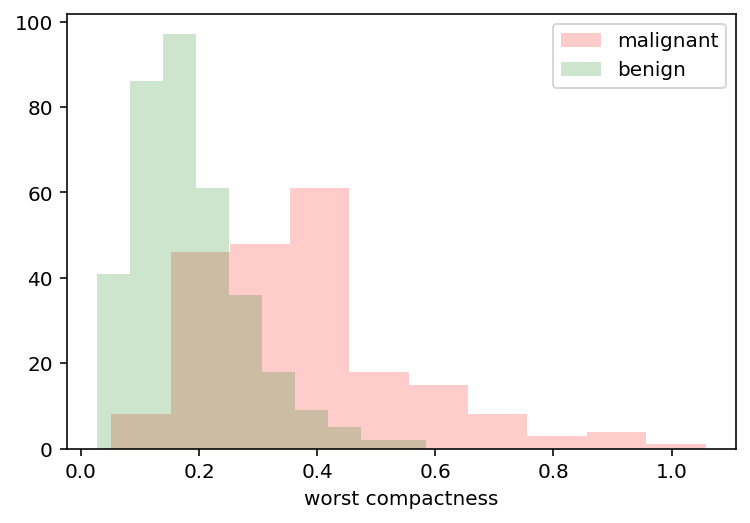

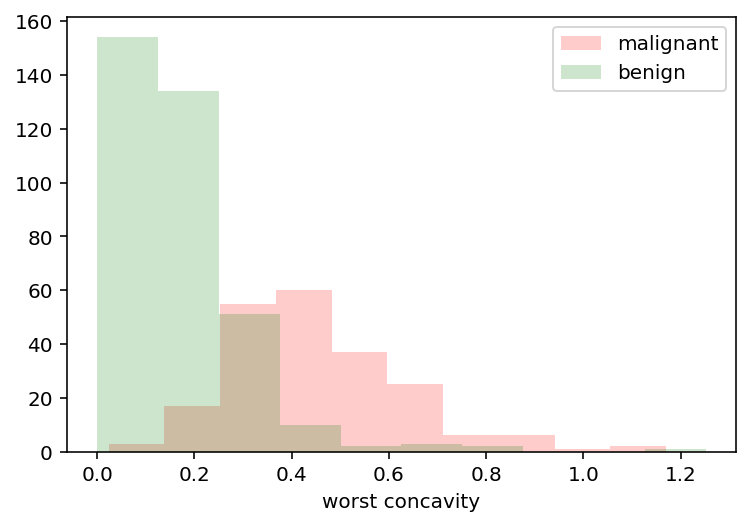

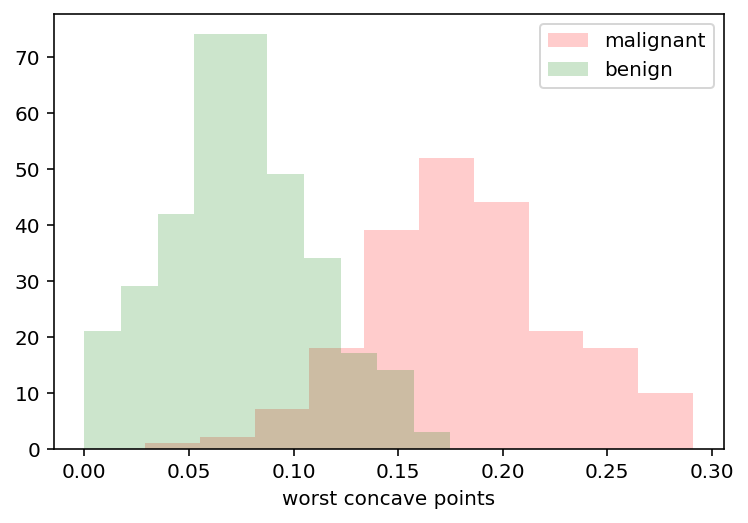

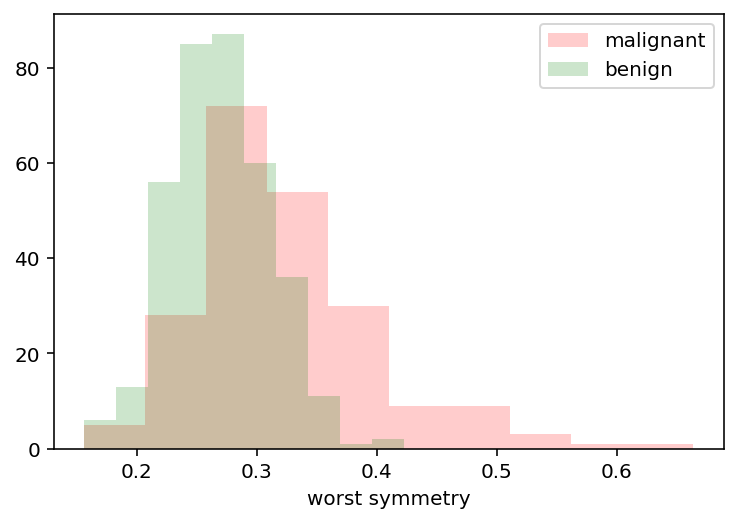

In [16]:
for a in range(0,29):
    x_index = a
    colors = ['red', 'green']

    for label, color in zip(range(len(data.target_names)), colors):
        plt.hist(data.data[data.target==label, x_index], 
                 label=data.target_names[label],
                 color=color, alpha=0.2)

    plt.xlabel(data.feature_names[x_index])
    plt.legend(loc='upper right')
    plt.show()

In [17]:
len_init = len(df)
len_init

569

In [18]:
df.dropna()


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst radius  worst texture  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     worst concavity  worst concave points  worst symmetry  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

In [19]:
df = df[(df.T != 0).any()]

In [20]:
print ('Number of dropped records: ', len_init - len(df))

Number of dropped records:  0


In [21]:
(df.var()/df.mean()).sort_values(ascending = False)

worst area                 368.128090
mean area                  189.106146
area error                  51.303457
worst perimeter             10.526926
mean perimeter               6.419992
worst texture                1.471206
worst radius                 1.435857
perimeter error              1.426312
mean texture                 0.959007
mean radius                  0.879073
texture error                0.250084
radius error                 0.189802
worst concavity              0.159904
worst compactness            0.097358
mean concavity               0.071569
worst concave points         0.037701
mean concave points          0.030779
concavity error              0.028570
mean compactness             0.026731
worst symmetry               0.013195
compactness error            0.012587
mean symmetry                0.004148
worst smoothness             0.003938
worst fractal dimension      0.003886
symmetry error               0.003326
concave points error         0.003228
mean smoothn

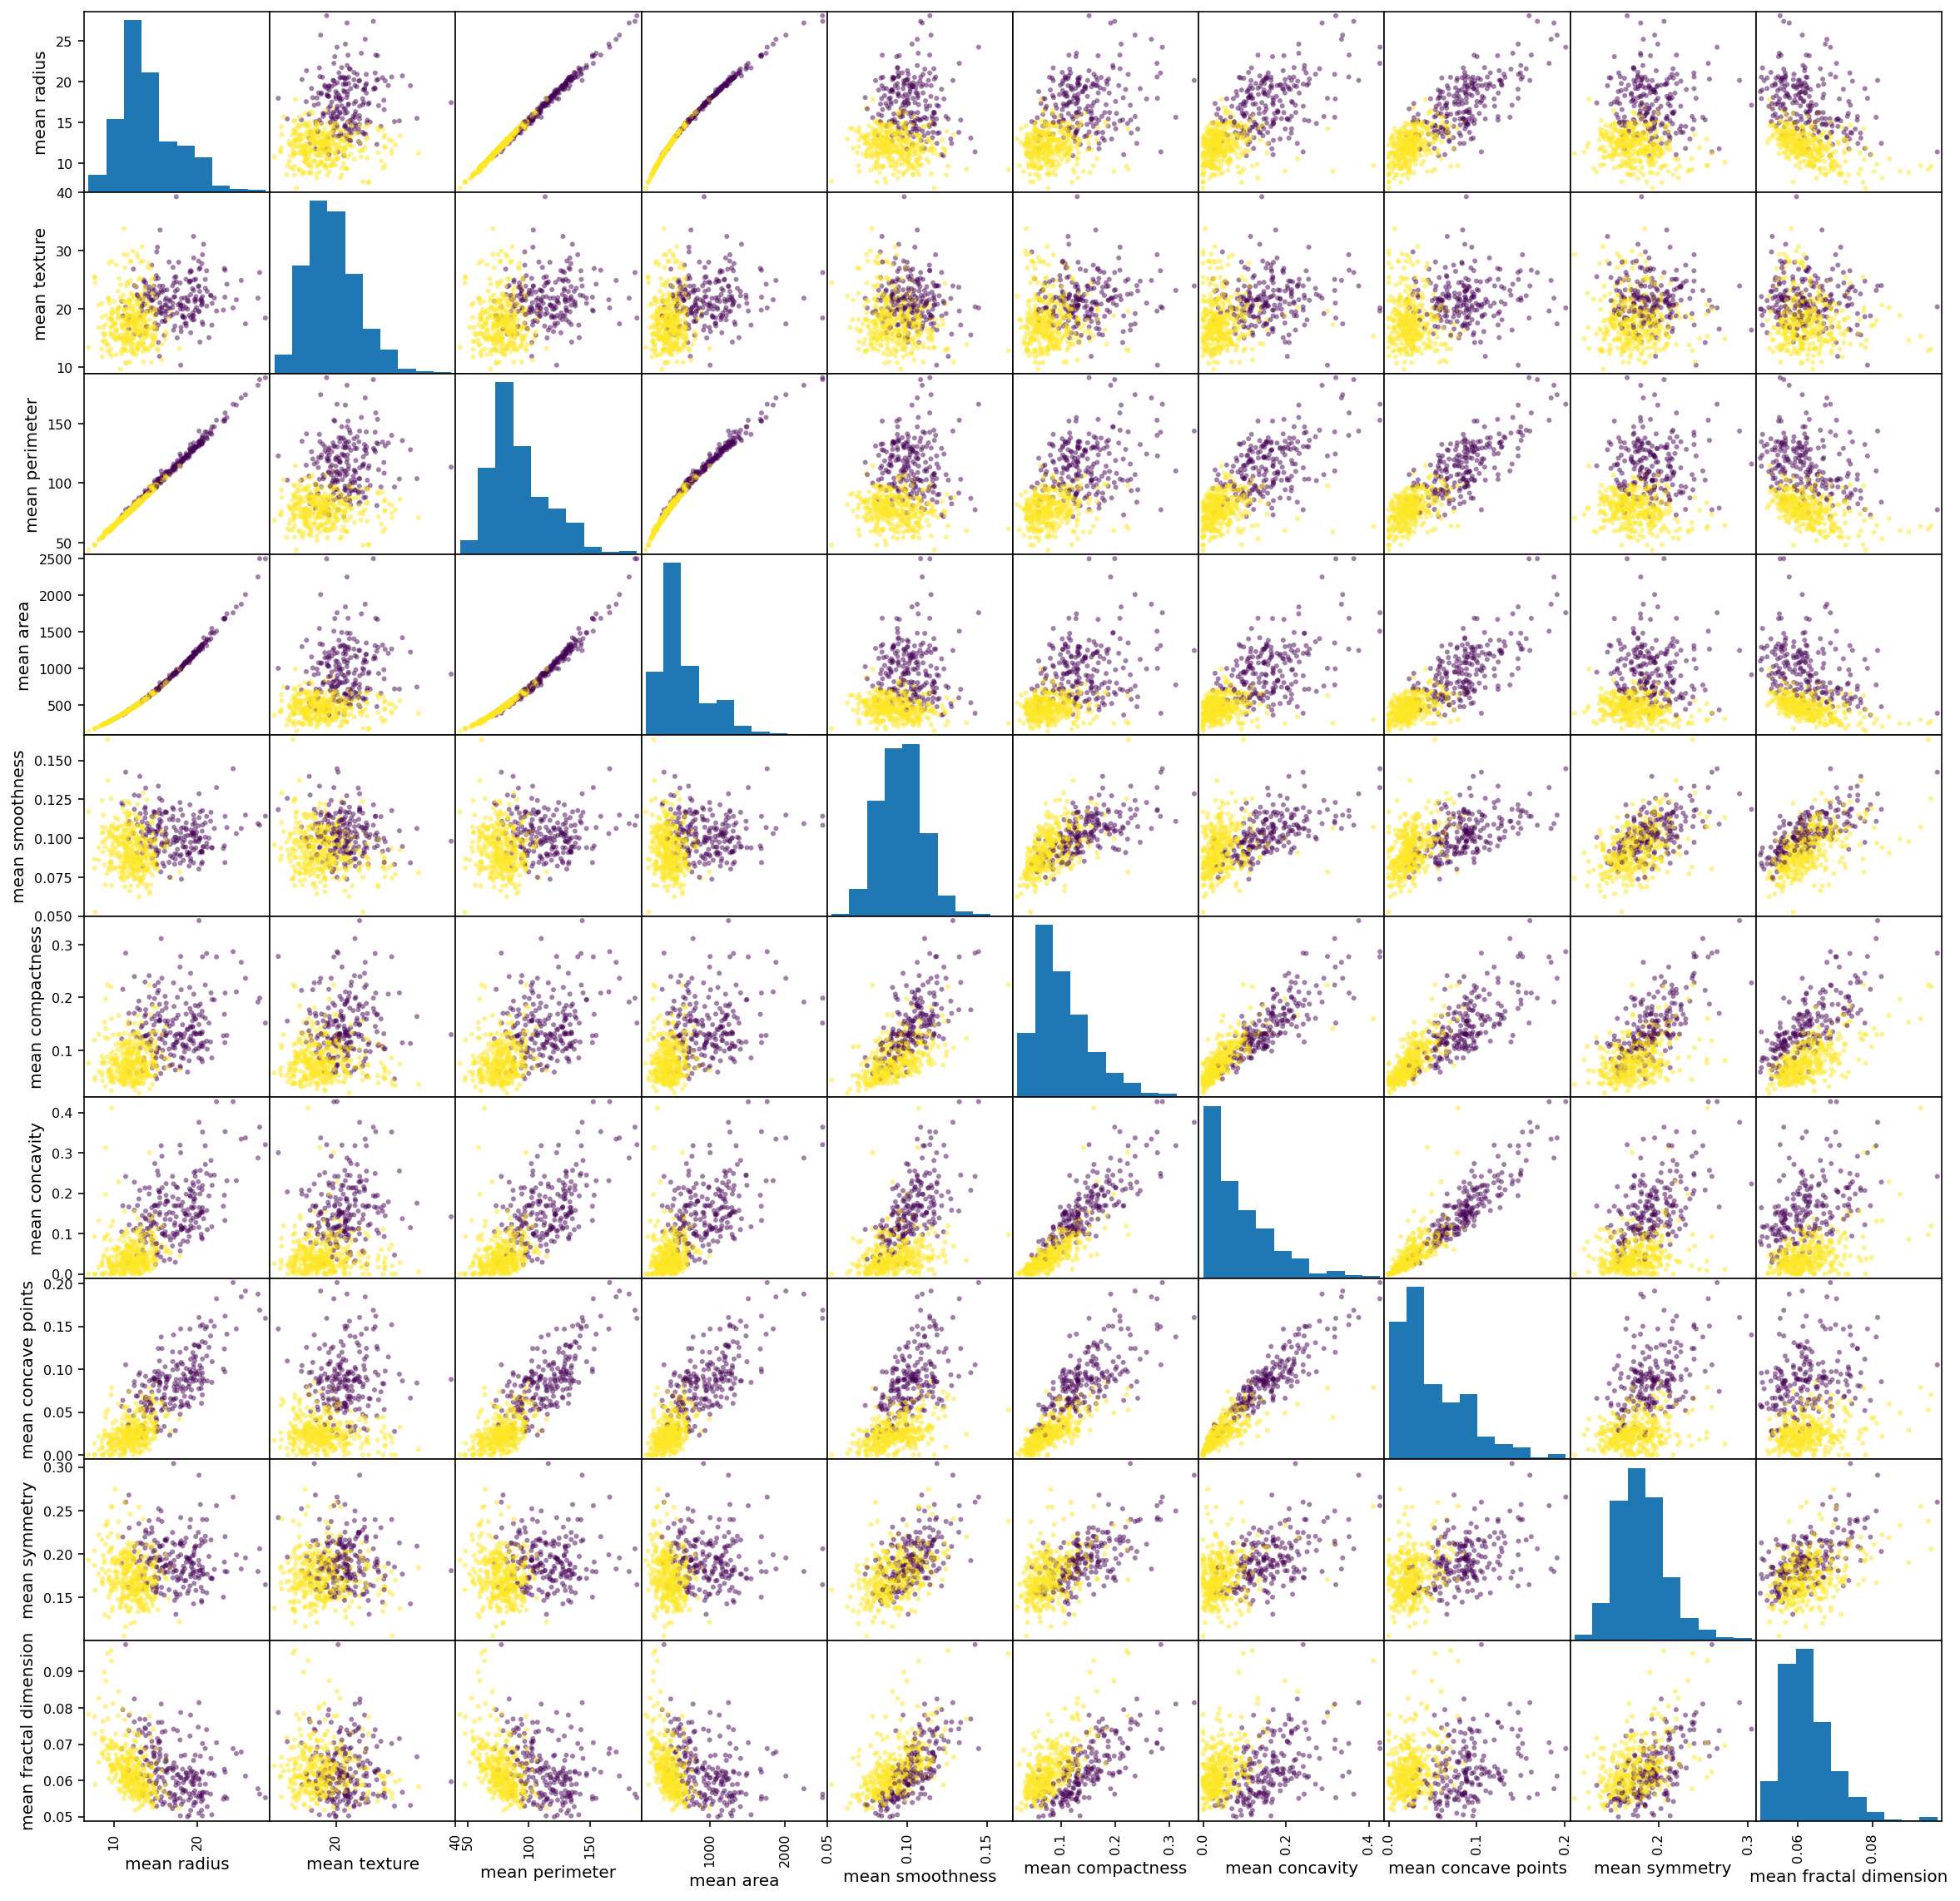

In [24]:
pd.plotting.scatter_matrix(df.iloc[:, :10], c=y, figsize=(20, 20));

In [25]:
corr = df.corr()

In [34]:
corr.replace(1.0, 0.0).unstack().sort_values(ascending = False).drop_duplicates()[0:20]


mean radius      mean perimeter         0.997855
worst perimeter  worst radius           0.993708
mean radius      mean area              0.987357
mean area        mean perimeter         0.986507
worst radius     worst area             0.984015
worst area       worst perimeter        0.977578
radius error     perimeter error        0.972794
mean perimeter   worst perimeter        0.970387
worst radius     mean radius            0.969539
mean perimeter   worst radius           0.969476
worst perimeter  mean radius            0.965137
mean area        worst radius           0.962746
worst area       mean area              0.959213
mean area        worst perimeter        0.959120
radius error     area error             0.951830
worst area       mean perimeter         0.941550
mean radius      worst area             0.941082
area error       perimeter error        0.937655
mean concavity   mean concave points    0.921391
worst texture    mean texture           0.912045
dtype: float64

In [35]:
# We remove all features else than mean

df2 = df.drop(columns = [c for c in df.keys()   if 'worst'  in c], axis=1)
df2 = df2.drop(columns = [c for c in df2.keys() if 'radius' in c], axis=1)
df2 = df2.drop(columns = [c for c in df2.keys() if 'error' in c], axis=1)
df2 = df2.drop(columns = [c for c in df2.keys() if 'concave points' in c], axis=1)
df2 = df2.drop(columns = [c for c in df2.keys() if 'area' in c], axis=1)

print ('Number of original features: ', len(df.keys()))
print ('Number of filtered features: ', len(df2.keys()))

corr = df2.corr()
corr.replace(1.0, 0.0).unstack().sort_values(ascending = False).drop_duplicates()[0:20]

Number of original features:  30
Number of filtered features:  7


mean concavity          mean compactness          0.883121
                        mean perimeter            0.716136
mean compactness        mean smoothness           0.659123
                        mean symmetry             0.602641
mean fractal dimension  mean smoothness           0.584792
mean compactness        mean fractal dimension    0.565369
mean smoothness         mean symmetry             0.557775
mean perimeter          mean compactness          0.556936
mean smoothness         mean concavity            0.521984
mean concavity          mean symmetry             0.500667
mean symmetry           mean fractal dimension    0.479921
mean fractal dimension  mean concavity            0.336783
mean perimeter          mean texture              0.329533
mean texture            mean concavity            0.302418
                        mean compactness          0.236702
mean smoothness         mean perimeter            0.207278
mean perimeter          mean symmetry             0.1830

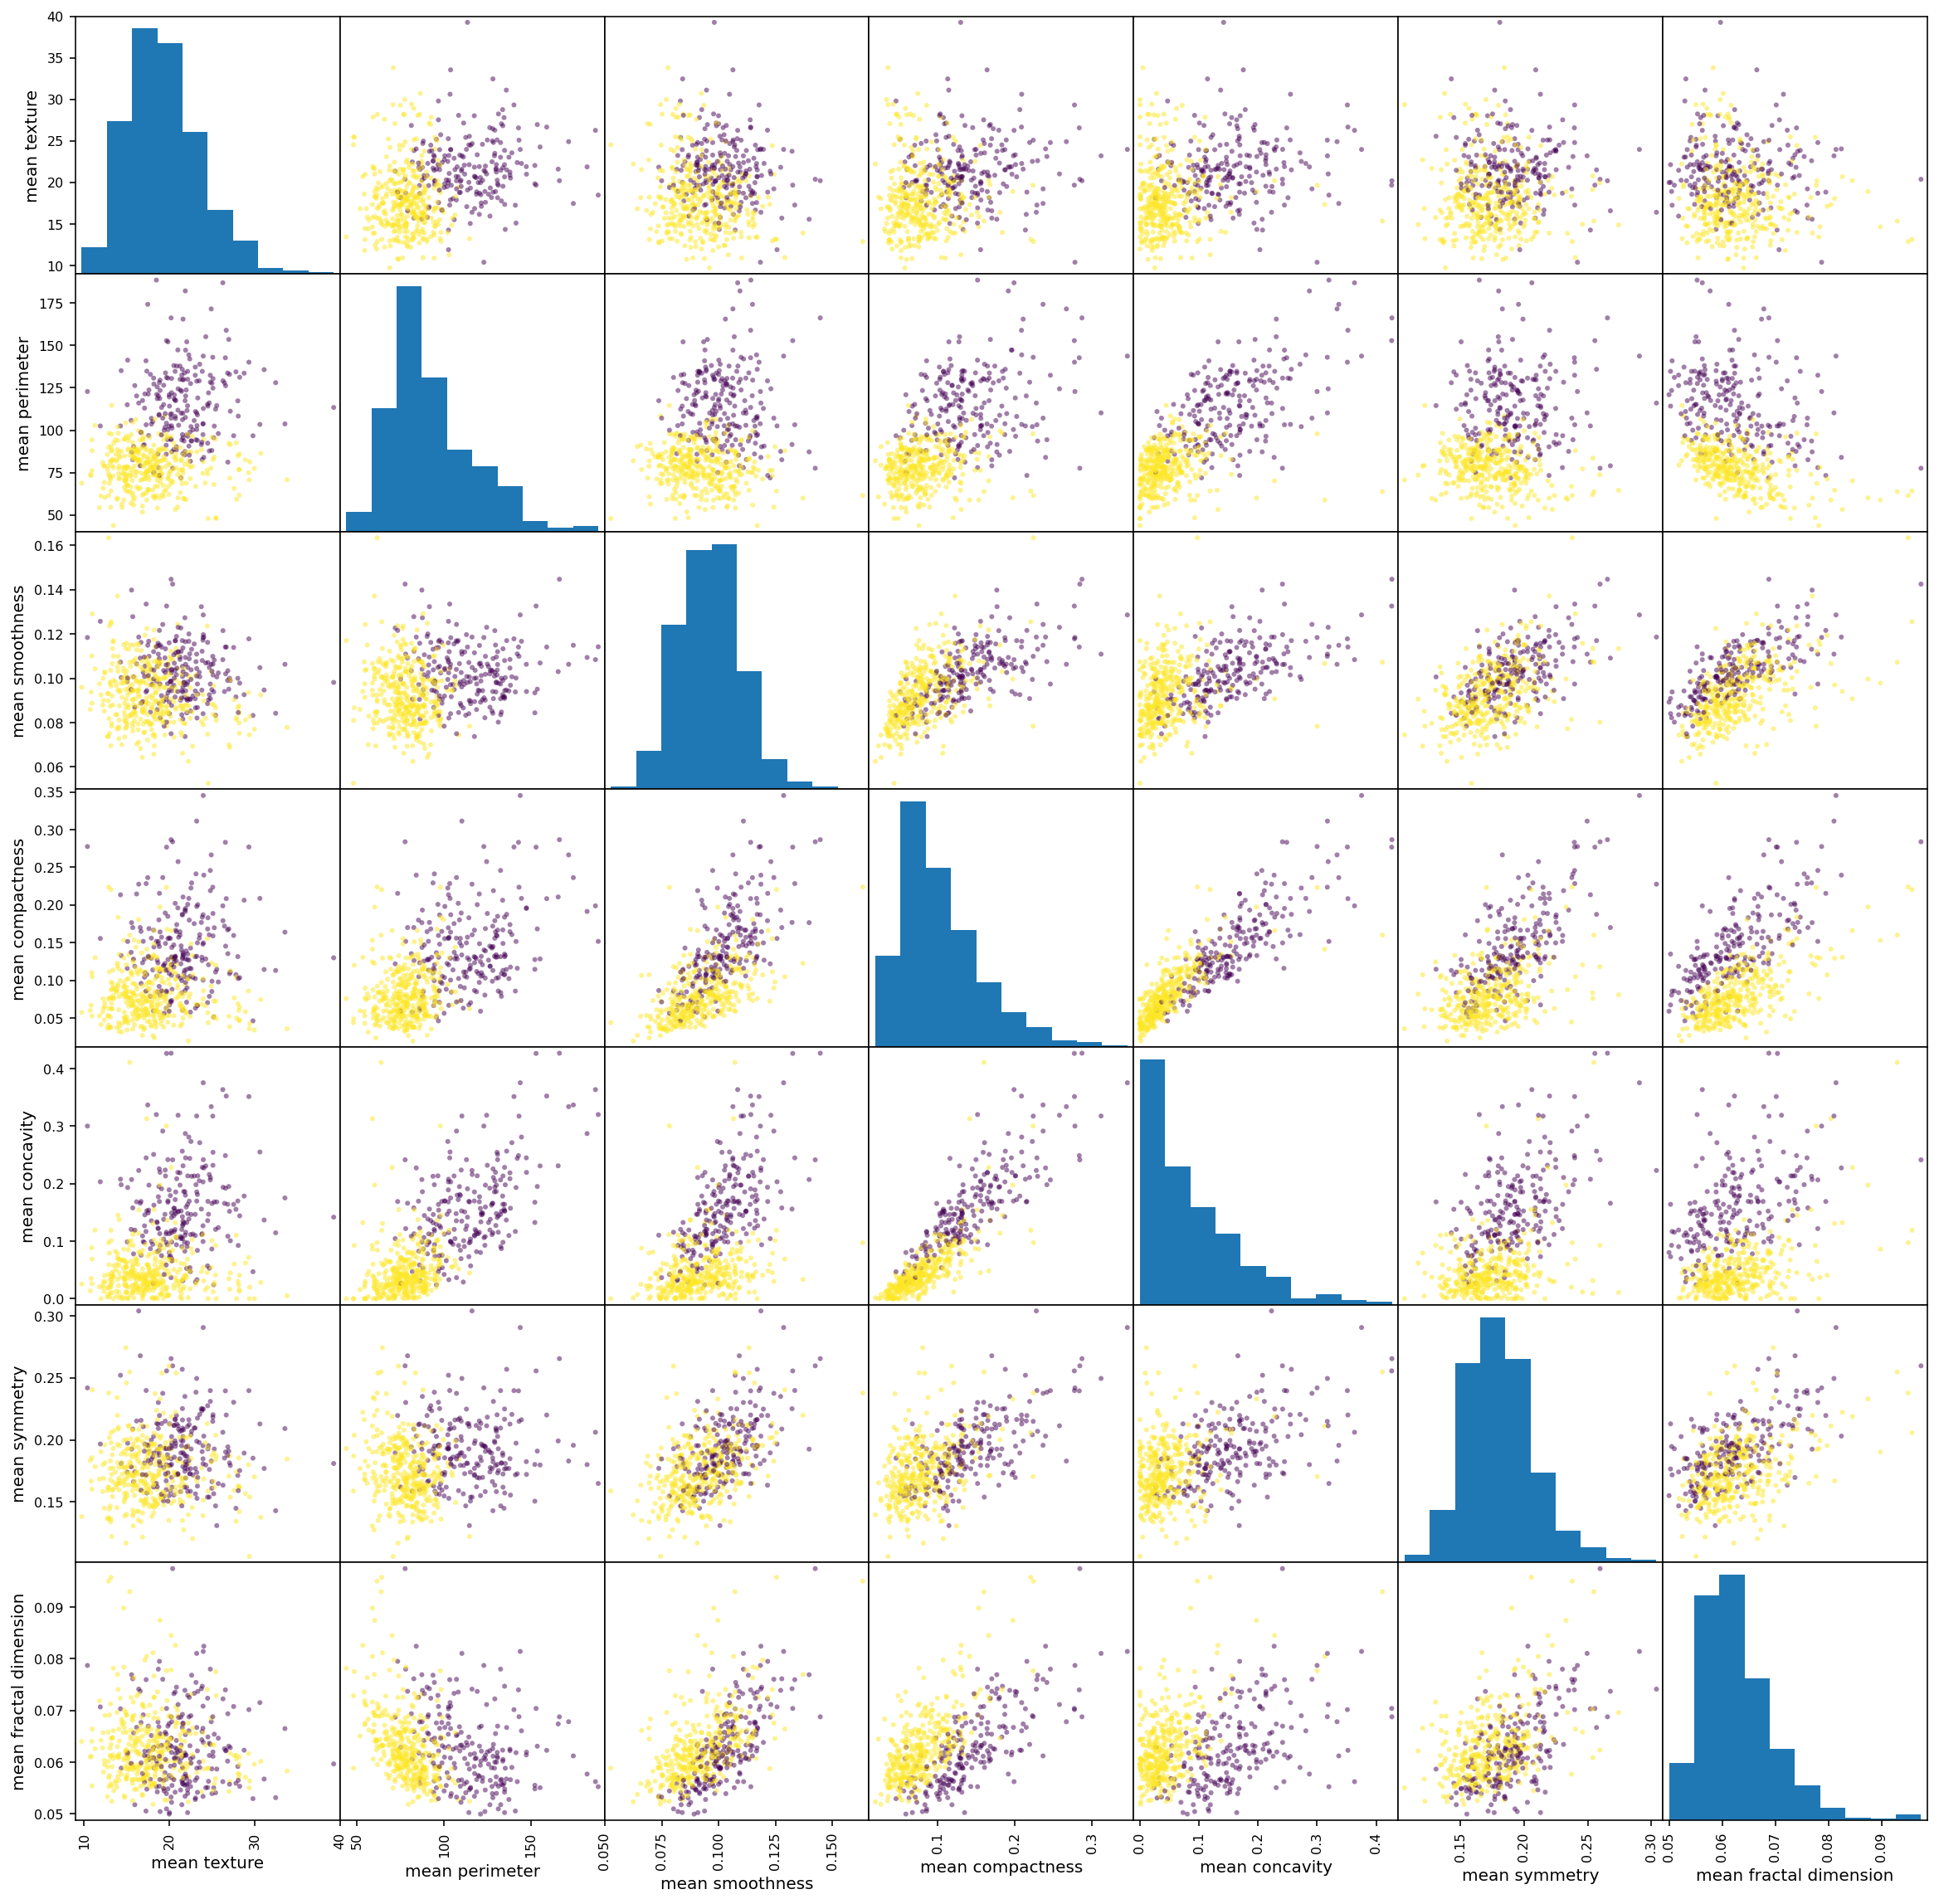

In [36]:
pd.plotting.scatter_matrix(df2, c=y, figsize=(20, 20));
plt.show()

## 3. Train a Decision Tree classifier

* Train a Decision Tree Classifier (e.g. using 0.8/0.2 division of the data for training and testing)

In [37]:
# Add your code

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


tree = DecisionTreeClassifier(random_state=123)
tree

DecisionTreeClassifier(random_state=123)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=123)

In [39]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [40]:
y_train.shape, y_test.shape

((455,), (114,))

In [41]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=123)

In [42]:
y_predicted = tree.predict(X_test)

In [45]:
tree.score(X_test, y_test)

0.956140350877193

## 4. Evaluate the performance of the classifier

   * Elaborate on the different type of errors your classifier is making and use different metrics to have a complete picture of the model behavior.   
   * Look at its confusion matrix
   * Print its classification report (classification_report)

In [ ]:
# Add your code

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix(y_test, y_predicted)

array([[38,  3],
       [ 2, 71]], dtype=int64)

In [47]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        41
           1       0.96      0.97      0.97        73

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## 5. Optimization

   * Explore the hyperparameters space looking for the configuration that optimizes the model performance. 
   * Use GridSearchCV to identify the optimal hyperparameters, e.g. with depth ranging between 0-20 and CV=5
   * Use sklearn.model_selection.learning_curve() to compute optimal hyperparameter of optimal training set size
   * Plot the train_scores and test_scores as the function of training size

In [ ]:
# Add your code

In [55]:
from sklearn.model_selection import GridSearchCV

tree_grid_search = GridSearchCV(tree, {'max_depth':range(1, 20)}, cv=5, verbose=1)
tree_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'max_depth': range(1, 20)}, verbose=1)

In [56]:
tree_grid_search.best_params_

{'max_depth': 4}

In [57]:
tree_grid_search.best_score_

0.9318681318681319

In [58]:
tree_grid_search.best_estimator_.score(X_test, y_test)

0.9649122807017544

In [60]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    tree_grid_search.best_estimator_, X, y, cv=10, train_sizes=np.linspace(.1, 1, 10))

In [61]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_mean

array([1.        , 1.        , 0.99542484, 0.98823529, 0.9875    ,
       0.98501629, 0.9849162 , 0.98606357, 0.98478261, 0.98496094])

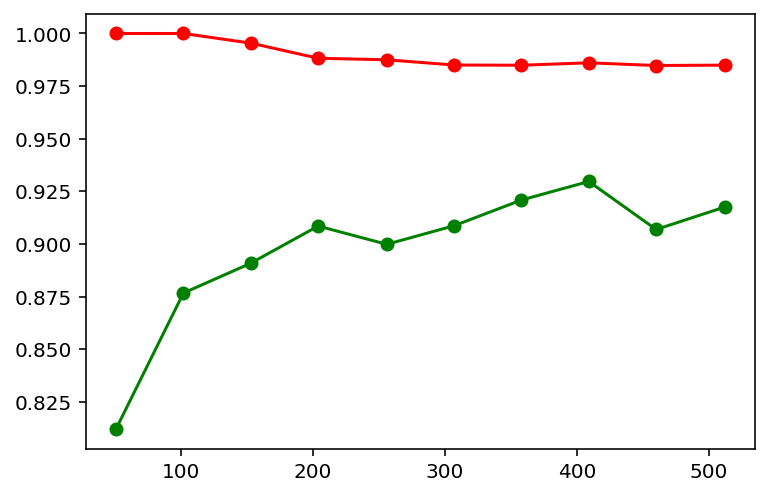

In [62]:
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Training score")

## 6. Train an alternative classifier (K-NN) and repeat steps 4-5

In [63]:
# Add your code
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.metrics import classification_report
import numpy as np

## 7. Decide wich approach to use if you were asked to solve the problem in a real case
   * Optimize KNN and DT by reading the validation curve
   * Optimize KNN and DT by gridsearch

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=max_depth, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


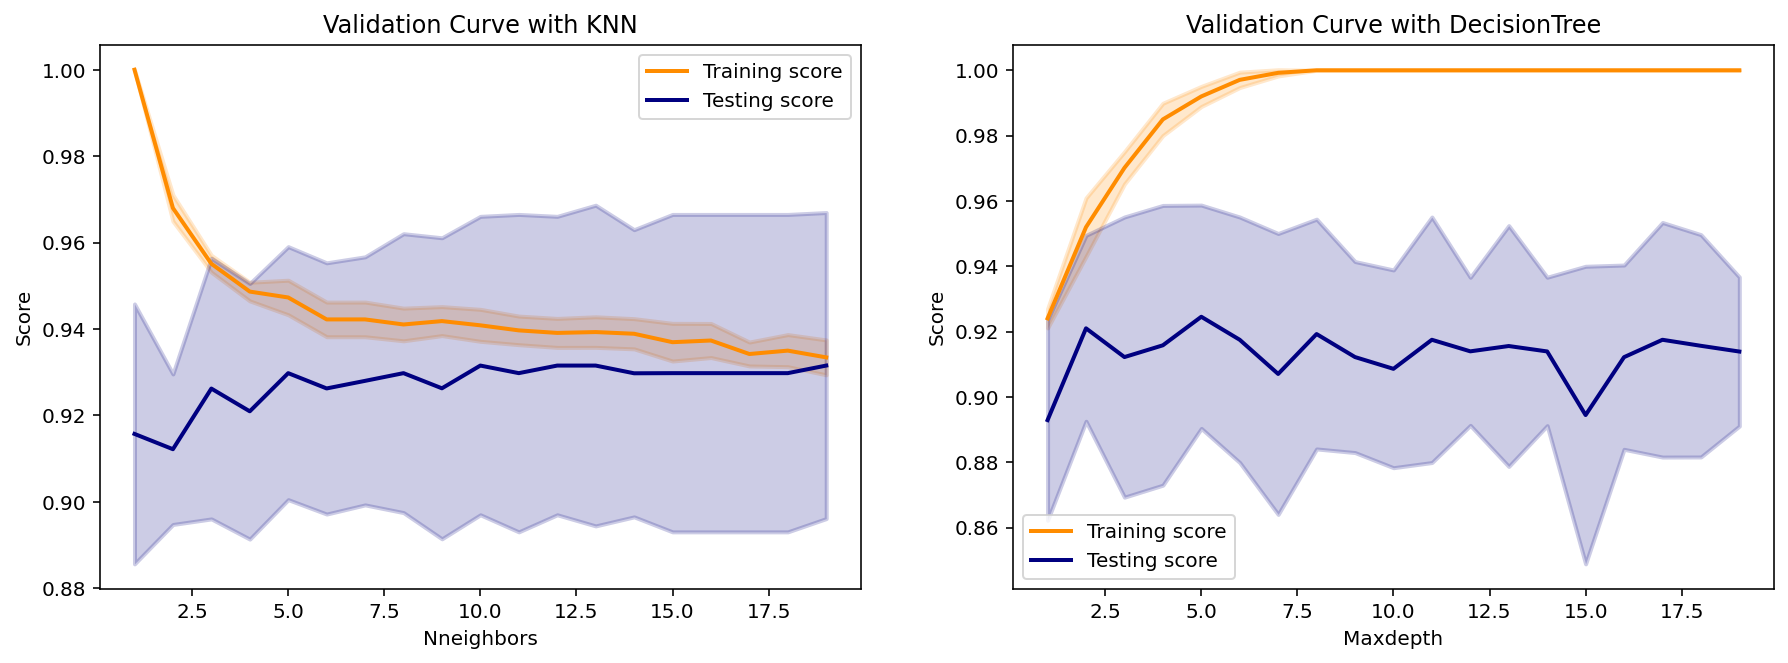

In [64]:
# Add your code
def optimize_with_validation_curve(classifier, title, ax, hyperparam):

    param_range = np.arange(1,20,1)      
    train_scores, test_scores = validation_curve(classifier, X, y, hyperparam, param_range, cv=10)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std  = np.std(train_scores, axis=1)
    test_scores_mean  = np.mean(test_scores, axis=1)
    test_scores_std   = np.std(test_scores, axis=1)

    ax.set_title("Validation Curve with " + title)
    ax.set_xlabel(hyperparam.replace('_', '').title())
    ax.set_ylabel("Score")
    lw = 2

    ax.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    ax.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    ax.plot(param_range, test_scores_mean, label="Testing score",
                 color="navy", lw=lw)
    ax.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    ax.legend(loc="best")

    
f, ax = plt.subplots(1,2,figsize=(15,5))    
optimize_with_validation_curve(KNeighborsClassifier(),   'KNN',           ax[0], 'n_neighbors')
optimize_with_validation_curve(DecisionTreeClassifier(), 'DecisionTree',  ax[1], 'max_depth')

1. Explore the data: use the approaches presented during the class to discuss the distribution of the typical parameters in each class. Which are more and less diverse? Rank the features based on their relative variance (variance divided by the mean of the set) of their distribution. Study the correlations between features. Which two are the most correlated? The goal of this part is to explore the features space to identify potential issues and instruct the pre-processing phase, e.g., normalization, missing values, feature engeneering (we'll explore these concepts better in the next classes).

2. Build a DecisionTreeClassifier with arbitrary depth, split the data into training and test sets, and measure the accuracy of the model on both (note: one measurement is no measurement, so make sure you repeat the randomization multiple times). Use alternative metrics that give you a better idea of the model performance. Try different ratios regarding the size of the training and the test sets and see how the accuriacies change. How does this change varies for different depth values? Can you observe the occurrance of under/overfitting? Is that consistent with your theoretical expectations? 

3. Solve the wine classification problem with 3-NN and evaluate it with 5-fold cross-validation. 

4. Output the accuracy of a k-NN classifier with the best value of the hyperparameter k. Comment your solution and the performance beyond accuracy. 

5. Which model would you pick (DecisionTree or k-NN) to solve the problem in a business context?     

In [65]:
# Optimize by gridsearch

def optimize_with_gridsearch(classifier):

    param_grid = {'max_depth': range(1,30,2)}

    grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, verbose=1,
                              return_train_score=True)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=0)

    grid_search.fit(X_train, y_train)
    y_pred = grid_search.best_estimator_.predict(X_test)
    

    print("\n\n-------------------------------------------------\n" + classifier + '\n')
    print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
    print("Best parameters: {}".format(grid_search.best_params_))
    print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
    print("Best estimator:\n{}".format(grid_search.best_estimator_))
    print('Accuracy on the testing set: {:.4f}'.format(grid_search.best_estimator_.score(X_test, y_test)))
    print('\nClassification report:\n', classification_report(y_test, y_pred))
    print('\n\n')
    
    
    
optimize_with_gridsearch('KNN')
optimize_with_gridsearch('DT')

Fitting 10 folds for each of 15 candidates, totalling 150 fits


-------------------------------------------------
KNN

Test set score: 0.92
Best parameters: {'max_depth': 5}
Best cross-validation score: 0.94
Best estimator:
DecisionTreeClassifier(max_depth=5)
Accuracy on the testing set: 0.9231

Classification report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90        53
           1       0.96      0.91      0.94        90

    accuracy                           0.92       143
   macro avg       0.91      0.93      0.92       143
weighted avg       0.93      0.92      0.92       143




Fitting 10 folds for each of 15 candidates, totalling 150 fits


-------------------------------------------------
DT

Test set score: 0.91
Best parameters: {'max_depth': 5}
Best cross-validation score: 0.93
Best estimator:
DecisionTreeClassifier(max_depth=5)
Accuracy on the testing set: 0.9091

Classification report:
               precision    